# Business Question: which customer segment need to focus on to help marketing team to wide the business?

In [212]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

# Gather Data

In [213]:
Transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'Transactions',skiprows = 1)

In [214]:
CustomerDemographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerDemographic',skiprows = 1)

In [215]:
CustomerAddress = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx',sheet_name = 'CustomerAddress',skiprows=1)

# Data Assessment

## Transactions Data

### Visual Assessment

In [216]:
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [217]:
Transactions.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,36334.0


### Programming Assessment

In [218]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [219]:
Transactions.order_status.unique()

array(['Approved', 'Cancelled'], dtype=object)

In [220]:
Transactions.brand.unique()

array(['Solex', 'Trek Bicycles', 'OHM Cycles', 'Norco Bicycles',
       'Giant Bicycles', 'WeareA2B', nan], dtype=object)

In [221]:
Transactions.product_line.unique()

array(['Standard', 'Road', 'Mountain', 'Touring', nan], dtype=object)

In [222]:
Transactions.product_class.unique()

array(['medium', 'low', 'high', nan], dtype=object)

In [223]:
Transactions.product_size.unique()

array(['medium', 'large', 'small', nan], dtype=object)

In [224]:
Transactions.transaction_id.duplicated().value_counts()

False    20000
Name: transaction_id, dtype: int64

### Assessment Summary (Transactions Data)

- datatype consistency [online_order] should be true or false not 0 or 1
- invalid [product_first_sold_date]
- completeness [online_order , brand , product_line , product_class , product_size , standard_cost] 

## CustomerDemographic Data

### Visual Assessment

In [225]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [226]:
CustomerDemographic.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


### Programming Assessment

In [227]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [228]:
CustomerDemographic.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [229]:
CustomerDemographic.job_industry_category.unique()

array(['Health', 'Financial Services', 'Property', 'IT', nan, 'Retail',
       'Argiculture', 'Manufacturing', 'Telecommunications',
       'Entertainment'], dtype=object)

In [230]:
CustomerDemographic.wealth_segment.unique()

array(['Mass Customer', 'Affluent Customer', 'High Net Worth'],
      dtype=object)

In [231]:
CustomerDemographic.deceased_indicator.unique()

array(['N', 'Y'], dtype=object)

In [232]:
CustomerDemographic.owns_car.unique()

array(['Yes', 'No'], dtype=object)

In [233]:
CustomerDemographic.customer_id.duplicated().value_counts()

False    4000
Name: customer_id, dtype: int64

### Assessment Summary (CustomerDemographic Data)

- inconsistent data [gender]
- invalid data [default]
- completeness

## CustomerAddress Data

### Visual Assessment

In [234]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [235]:
CustomerAddress.tail()

,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


### Programming Assessment

In [236]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [237]:
CustomerAddress.customer_id.duplicated().value_counts()

False    3999
Name: customer_id, dtype: int64

In [238]:
CustomerAddress.country.unique()

array(['Australia'], dtype=object)

### Assessment Summary (CustomerAddress Data)
- this dataset is clear

### Checking The Synchronization Between Tables

In [239]:
CustomerAddress.customer_id.isin(CustomerDemographic.customer_id).value_counts()

True     3996
False       3
Name: customer_id, dtype: int64

In [240]:
CustomerAddress.customer_id.isin(Transactions.customer_id).value_counts()

True     3489
False     510
Name: customer_id, dtype: int64

# Data Cleaning

### Issue: The tables Synchronization
we need to filter tables to get the data only related the current customers we actualy have

### Code

In [241]:
newCustomerAddress = CustomerAddress[CustomerAddress.customer_id.isin(CustomerDemographic.customer_id)]
newCustomerAddress = CustomerAddress[CustomerAddress.customer_id.isin(Transactions.customer_id)]

In [242]:
newTrans = Transactions[Transactions.customer_id.isin(newCustomerAddress.customer_id)]

In [243]:
newCustomerDemographic = CustomerDemographic[CustomerDemographic.customer_id.isin(newCustomerAddress.customer_id)]

### Test

In [244]:
print('Transaction data shape: \nbefore: {0} after: {1}'.format(Transactions.shape,newTrans.shape))
print('CustomerDemographic data shape: \nbefore: {0} after: {1}'.format(CustomerDemographic.shape,newCustomerDemographic.shape))
print('CustomerAddress data shape: \nbefore: {0} after: {1}'.format(CustomerAddress.shape,newCustomerAddress.shape))

Transaction data shape: 
before: (20000, 13) after: (19968, 13)
CustomerDemographic data shape: 
before: (4000, 13) after: (3489, 13)
CustomerAddress data shape: 
before: (3999, 6) after: (3489, 6)


## Transactions DataFrame

### 1- Issue: data vlaue consistancy
- the values in the online_order are 0.0 and 0.1 instead true and false so we need to replace these values by 1.0 = True and 0.0 = False

### Code

In [245]:
newTrans.online_order = newTrans.online_order.astype('bool')

C:\Users\Romany\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Test

In [246]:
newTrans.online_order.value_counts()

True     10177
False     9791
Name: online_order, dtype: int64

### 2- Issue: data validity
the column product_first_sold_date has float data rather than date data formate. so, this column is not valid

### Code

In [247]:
newTrans.drop('product_first_sold_date',axis = 'columns',inplace = True)

C:\Users\Romany\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Test

In [248]:
'product_first_sold_date' in newTrans.columns

False

### 3- Issue: missing values

### Code

In [249]:
newTrans.isnull().sum()/len(newTrans)

transaction_id      0.000000
product_id          0.000000
customer_id         0.000000
transaction_date    0.000000
online_order        0.000000
order_status        0.000000
brand               0.009766
product_line        0.009766
product_class       0.009766
product_size        0.009766
list_price          0.000000
standard_cost       0.009766
dtype: float64

In [250]:
# newTrans.brand.replace({np.nan:g.brand.mode().tolist()[0]}, inplace=True)
# newTrans.product_line.replace({np.nan:g.product_line.mode().tolist()[0]}, inplace=True)
# newTrans.product_class.replace({np.nan:g.product_class.mode().tolist()[0]}, inplace=True)
# newTrans.product_size.replace({np.nan:g.product_size.mode().tolist()[0]}, inplace=True)
newTrans.standard_cost.replace({np.nan:newTrans.standard_cost.mean()}, inplace=True)
cols = ['brand','product_line','product_class','product_size']
for col in cols:
    newTrans[col].replace({np.nan: newTrans[col].mode().tolist()[0]}, inplace=True)

C:\Users\Romany\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


### Test

In [251]:
newTrans.isnull().sum()

transaction_id      0
product_id          0
customer_id         0
transaction_date    0
online_order        0
order_status        0
brand               0
product_line        0
product_class       0
product_size        0
list_price          0
standard_cost       0
dtype: int64

In [252]:
newTrans.dtypes

transaction_id               int64
product_id                   int64
customer_id                  int64
transaction_date    datetime64[ns]
online_order                  bool
order_status                object
brand                       object
product_line                object
product_class               object
product_size                object
list_price                 float64
standard_cost              float64
dtype: object

## CustomerDemographic Dataframe

### 1- Issue: inconsistent data
gender column has different shapes for the same value such as Male and M 

### Code

In [253]:
newCustomerDemographic.gender = newCustomerDemographic.gender.replace('M','Male')
newCustomerDemographic.gender = newCustomerDemographic.gender.replace(['Femal','F'],'Female')
newCustomerDemographic.gender = newCustomerDemographic.gender.replace('U','Unknown')

### Test

In [254]:
newCustomerDemographic.gender.value_counts()

Female     1758
Male       1654
Unknown      77
Name: gender, dtype: int64

### 2- Issue:  data validity
default has string mysterious values which are don't have any meaning

### Code

In [255]:
newCustomerDemographic.drop('default',axis = 'columns',inplace = True)

### Test

In [256]:
'default' in newCustomerDemographic.columns

False

### 3- Issue: Missing Values:

### Code

- fiiling the missing values in job category depending on the job title column

In [257]:
job_data = dict()
test_copy = newCustomerDemographic[(~newCustomerDemographic.job_title.isnull()) & (~newCustomerDemographic.job_industry_category.isnull())]
for i in test_copy.customer_id:
    job_data[test_copy[test_copy.customer_id == i].job_title.to_list()[0]] =  test_copy[test_copy.customer_id == i].job_industry_category.to_list()[0]  

In [316]:
for i in newCustomerDemographic.customer_id:
    if (newCustomerDemographic[newCustomerDemographic.customer_id == i].job_title.to_list()[0] in job_data) and (newCustomerDemographic[newCustomerDemographic.customer_id == i].job_industry_category.isnull().to_list()[0]):
        newCustomerDemographic.loc[newCustomerDemographic.customer_id == i,'job_industry_category'] = job_data[newCustomerDemographic[newCustomerDemographic.customer_id == i].job_title.to_list()[0]]

- test: the missing values in job category reduced from over 600 into 87 rows with missing values

In [259]:
newCustomerDemographic.job_industry_category.value_counts()

Manufacturing         832
Financial Services    784
Health                595
Retail                375
Property              257
IT                    246
Entertainment         128
Argiculture           122
Telecommunications     63
Name: job_industry_category, dtype: int64

In [260]:
newCustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              112
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     76
job_title                              421
job_industry_category                   87
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  76
dtype: int64

- but there is some rows still need to fill. so, i breakdown the data

In [261]:
test = newCustomerDemographic.copy()
for wealth in test.wealth_segment.unique().tolist():
    for gender in test.gender.unique().tolist():
        for own in test.owns_car.unique().tolist():
            new = test[(test.wealth_segment == wealth) & (test.gender == gender) & (test.owns_car == own)]
            result = new.fillna(value={'job_industry_category': new['job_industry_category'].mode().tolist()[0]})
            for i in result.customer_id:
                if i in test.customer_id: 
                    test.loc[test.customer_id == i] = result.loc[result.customer_id == i]
newCustomerDemographic = test

In [262]:
newCustomerDemographic['tenure'].fillna(newCustomerDemographic['tenure'].mean(),inplace=True)
newCustomerDemographic['DOB'].fillna(newCustomerDemographic['DOB'].mode().tolist()[0],inplace=True)

### Test

In [263]:
newCustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              112
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              421
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

# Data Exploration

## Transaction Data

In [264]:
newTrans.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost
count,19968.000000,19968.000000,19968.000000,19968.000000,19968.000000
mean,9997.846504,45.365986,1740.254307,1107.780004,556.091050
std,5773.929973,30.750115,1009.819066,582.852548,403.979251
min,1.000000,0.000000,1.000000,12.010000,7.210000
25%,4997.750000,18.000000,861.750000,575.270000,215.140000
50%,9996.500000,44.000000,1739.500000,1163.890000,507.580000
75%,14996.250000,72.000000,2614.250000,1635.300000,795.100000
max,20000.000000,100.000000,3500.000000,2091.470000,1759.850000


### what is the most frequent brand?

Text(0.5, 1.0, 'the brand count between transactions')

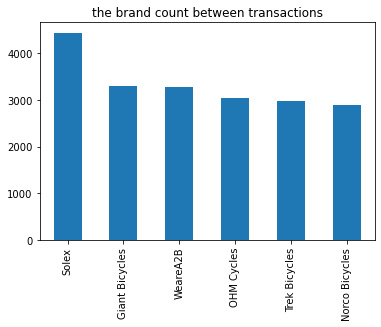

In [265]:
newTrans.brand.value_counts().plot.bar()
plt.title('the brand count between transactions')

### what is the most frequent product line?

Text(0.5, 1.0, 'the product line count between transactions')

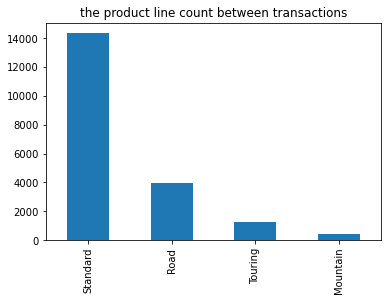

In [266]:
newTrans.product_line.value_counts().plot.bar()
plt.title('the product line count between transactions')

###  what is the most frequent product class?

Text(0.5, 1.0, 'the product class count between transactions')

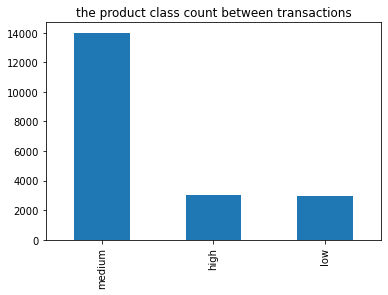

In [267]:
newTrans.product_class.value_counts().plot.bar()
plt.title('the product class count between transactions')

### what is the most frequent product size?

Text(0.5, 1.0, 'the product size count between transactions')

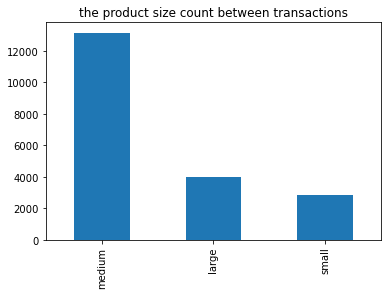

In [268]:
newTrans.product_size.value_counts().plot.bar()
plt.title('the product size count between transactions')

## CustomerDemographic Data

In [269]:
newCustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,3489.000000,3489.000000,3489.000000
mean,1751.905704,48.795930,10.681219
std,1009.388703,28.607358,5.612312
min,1.000000,0.000000,1.000000
25%,879.000000,24.000000,6.000000
50%,1752.000000,48.000000,10.681219
75%,2625.000000,73.000000,15.000000
max,3500.000000,99.000000,22.000000


### what is the minimum customer age?

In [270]:
date.today().year - newCustomerDemographic.DOB.max().year

19

### what is the minimum customer age?

In [271]:
date.today().year - newCustomerDemographic.DOB.min().year

178

### what is the most gender of customers?

Text(0.5, 1.0, 'the gender of customers')

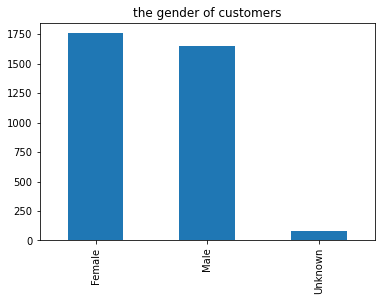

In [272]:
newCustomerDemographic.gender.value_counts().plot.bar()
plt.title('the gender of customers')

Text(0.5, 1.0, 'the count of customers for each job industry category')

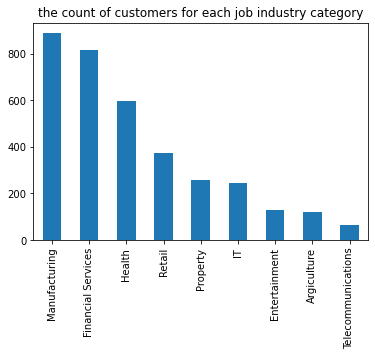

In [273]:
newCustomerDemographic.job_industry_category.value_counts().plot.bar()
plt.title('the count of customers for each job industry category')

Text(0.5, 1.0, 'the count of customers for each wealth segment')

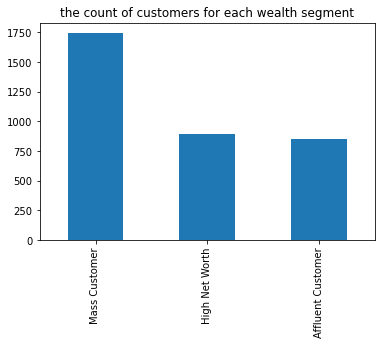

In [274]:
newCustomerDemographic.wealth_segment.value_counts().plot.bar()
plt.title('the count of customers for each wealth segment')

Text(0.5, 1.0, 'the count of customers owns cars')

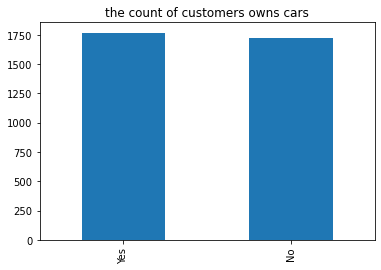

In [275]:
newCustomerDemographic.owns_car.value_counts().plot.bar()
plt.title('the count of customers owns cars')

## Customer Address

In [276]:
newCustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3489 entries, 0 to 3495
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3489 non-null   int64 
 1   address             3489 non-null   object
 2   postcode            3489 non-null   int64 
 3   state               3489 non-null   object
 4   country             3489 non-null   object
 5   property_valuation  3489 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 190.8+ KB


Text(0.5, 1.0, 'the count of customers in each state')

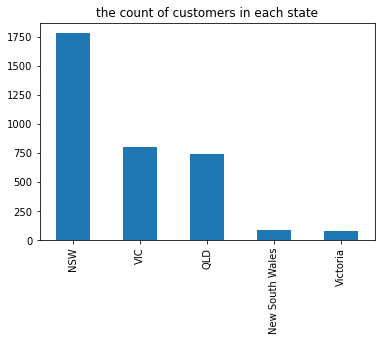

In [277]:
newCustomerAddress.state.value_counts().plot.bar()
plt.title('the count of customers in each state')

# Feature Engineering

In [278]:
newTrans['gross_profit'] = newTrans['list_price'] - newTrans['standard_cost']

<ipython-input-278-8af744551732>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newTrans['gross_profit'] = newTrans['list_price'] - newTrans['standard_cost']


In [279]:
newTrans['gross_profit_category'] = pd.cut(x = newTrans.gross_profit, bins = [0,newTrans.gross_profit.max()*0.33,newTrans.gross_profit.max()*0.66,newTrans.gross_profit.max()],labels = ['Low','Medium','High'])

<ipython-input-279-e1d160f49391>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newTrans['gross_profit_category'] = pd.cut(x = newTrans.gross_profit, bins = [0,newTrans.gross_profit.max()*0.33,newTrans.gross_profit.max()*0.66,newTrans.gross_profit.max()],labels = ['Low','Medium','High'])


In [280]:
newCustomerDemographic['age'] = date.today().year - newCustomerDemographic.DOB.dt.year
newCustomerDemographic['age_group'] = pd.cut(x = newCustomerDemographic.age, bins = [0,14,24,64,newCustomerDemographic.age.max()],labels = ['Children (0-14)','Youth (15-24)','Adults (25-64)','Seniors (64+)'])
newCustomerDemographic['age_range'] = pd.cut(x = newCustomerDemographic.age, bins = [0,14,24,34,44,54,64,newCustomerDemographic.age.max()],labels = ['(0-14)','(15-24)','(25-34)','(35-44)','(45-54)','(55-64)','(64+)'])

### Test Feature Engineering

In [281]:
newCustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'age', 'age_group', 'age_range'],
      dtype='object')

In [282]:
newCustomerDemographic.age_range.unique()

['(64+)', '(35-44)', '(55-64)', '(45-54)', '(25-34)', '(15-24)']
Categories (6, object): ['(15-24)' < '(25-34)' < '(35-44)' < '(45-54)' < '(55-64)' < '(64+)']

In [283]:
newTrans.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'gross_profit', 'gross_profit_category'],
      dtype='object')

# Outliers

<AxesSubplot:>

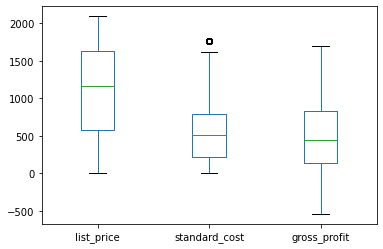

In [284]:
newTrans[['list_price','standard_cost','gross_profit']].plot.box()

<AxesSubplot:>

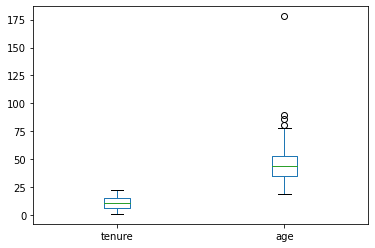

In [285]:
newCustomerDemographic[['tenure', 'age']].plot.box()

In [286]:
newCustomerDemographic.age.sort_values().tail(10)

3102     68
1242     68
1176     68
2745     68
657      77
2412     78
3409     81
1091     86
719      90
33      178
Name: age, dtype: int64

In [287]:
newCustomerDemographic.age.value_counts().tail(10)

38     31
20     29
68     18
19      6
81      1
78      1
86      1
77      1
178     1
90      1
Name: age, dtype: int64

In [288]:
newCustomerDemographic = newCustomerDemographic[newCustomerDemographic.age < 75]

### Test Outliers

In [289]:
newCustomerDemographic.age.value_counts().tail()

39    36
38    31
20    29
68    18
19     6
Name: age, dtype: int64

### what is the most frequent age range of customers ?

Text(0.6, 1.03, 'the most frequent age range of customers')

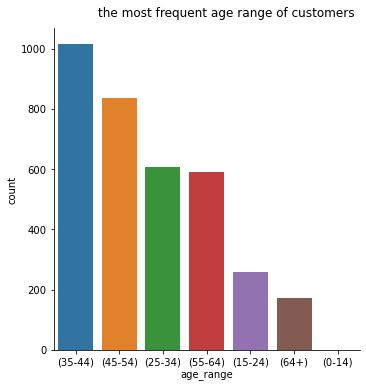

In [290]:
sorting  = newCustomerDemographic.age_range.value_counts().index
wealth_segment = sns.catplot(x = 'age_range',data = newCustomerDemographic, kind = 'count',order = sorting)
wealth_segment.fig.suptitle('the most frequent age range of customers',y = 1.03,x = 0.6)

### what is the count of car owner for each wealth segmentation?

Text(0.6, 1.03, 'count of having cars per each wealth segment')

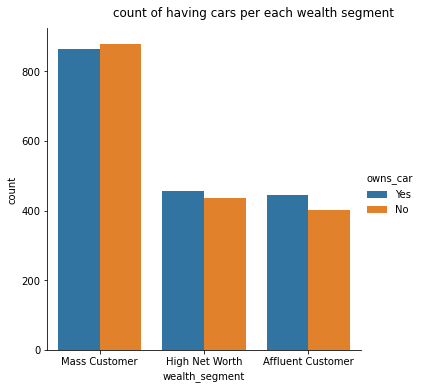

In [291]:
sorting  = newCustomerDemographic.wealth_segment.value_counts().index
wealth_segment = sns.catplot(x = 'wealth_segment',data = newCustomerDemographic, kind = 'count',order = sorting,hue = 'owns_car')
wealth_segment.fig.suptitle('count of having cars per each wealth segment',y = 1.03,x = 0.6)

### what is the count of customers job industry category for each wealth segmentation?

Text(0.6, 1.03, 'count of customers in job industry categories cars per each wealth segment')

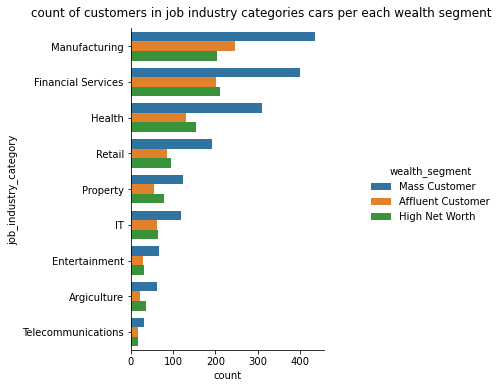

In [292]:
sorting  = newCustomerDemographic.job_industry_category.value_counts().index
job_industry_category = sns.catplot(y = 'job_industry_category',data = newCustomerDemographic, kind = 'count',order = sorting,hue = 'wealth_segment')
job_industry_category.fig.suptitle('count of customers in job industry categories cars per each wealth segment',y = 1.03,x = 0.6)

## Combination Datasets Analysis

### what is the count of customers wealth segmentation for each each state?

In [293]:
customer_data = newCustomerAddress.merge(newCustomerDemographic,how = 'inner',on = 'customer_id')
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3483 entries, 0 to 3482
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3483 non-null   int64         
 1   address                              3483 non-null   object        
 2   postcode                             3483 non-null   int64         
 3   state                                3483 non-null   object        
 4   country                              3483 non-null   object        
 5   property_valuation                   3483 non-null   int64         
 6   first_name                           3483 non-null   object        
 7   last_name                            3371 non-null   object        
 8   gender                               3483 non-null   object        
 9   past_3_years_bike_related_purchases  3483 non-null   int64         
 10  DOB         

### what is count of customers in each state cars per each wealth segment?

Text(0.6, 1.03, 'count of customers in each state per each wealth segment')

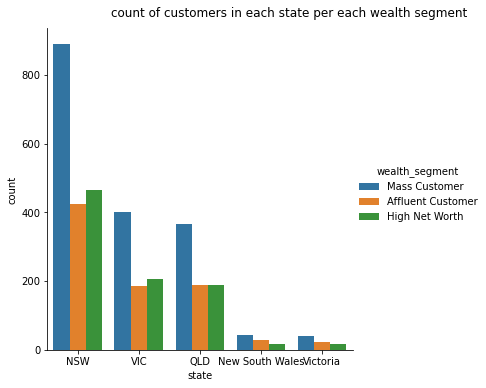

In [294]:
sorting  = customer_data.state.value_counts().index
state = sns.catplot(x = 'state',data = customer_data, kind = 'count',order = sorting,hue = 'wealth_segment')
state.fig.suptitle('count of customers in each state per each wealth segment',y = 1.03,x = 0.6)

### what is the count of customers for each  job industry category segmentation in each each state?

Text(0.6, 1.03, 'count of customers in each industry category per each state')

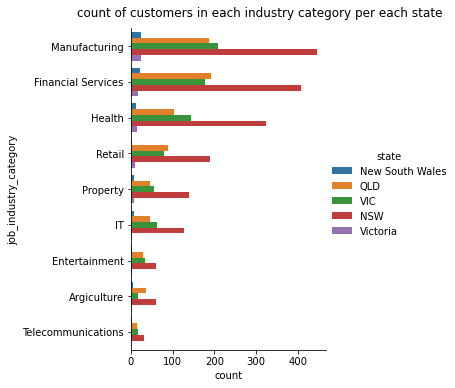

In [295]:
sorting  = customer_data.job_industry_category.value_counts().index
job_industry_category = sns.catplot(y = 'job_industry_category',data = customer_data, kind = 'count',order = sorting,hue = 'state')
job_industry_category.fig.suptitle('count of customers in each industry category per each state',y = 1.03,x = 0.6)

### what is the count for each age category of customers?

Text(0.6, 1.03, 'count of customers in each age group')

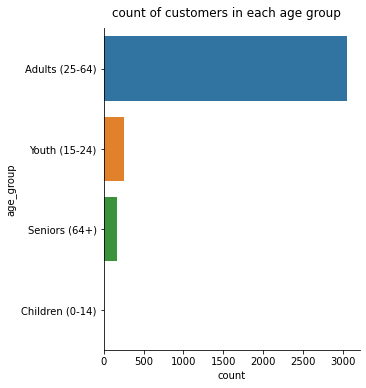

In [296]:
sorting  = customer_data.age_group.value_counts().index
age_group = sns.catplot(y = 'age_group',data = customer_data, kind = 'count',order = sorting)
age_group.fig.suptitle('count of customers in each age group',y = 1.03,x = 0.6)

### what is the count for each age category of customers for each state?

Text(0.6, 1.03, 'count of customers in each state per age group')

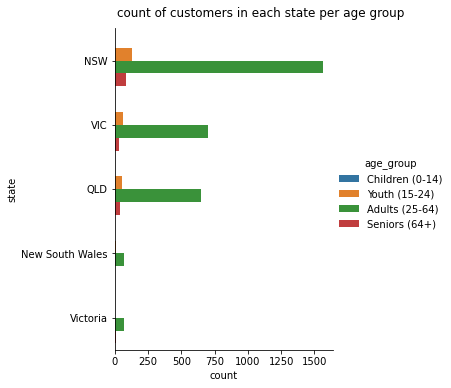

In [297]:
sorting  = customer_data.state.value_counts().index
state = sns.catplot(y = 'state',data = customer_data, kind = 'count',order = sorting,hue = 'age_group')
state.fig.suptitle('count of customers in each state per age group',y = 1.03,x = 0.6)

### what is the count for each age category of customers for each gender?

Text(0.6, 1.03, 'count of customers in each age group per gender')

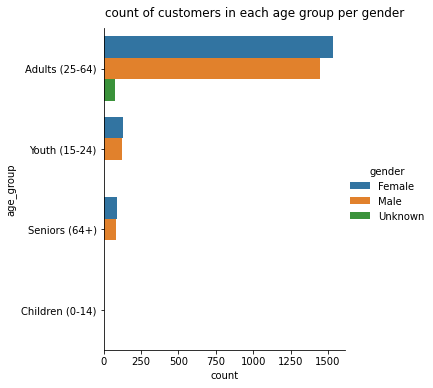

In [298]:
sorting  = customer_data.age_group.value_counts().index
age_group = sns.catplot(y = 'age_group',data = customer_data, kind = 'count',order = sorting,hue = 'gender')
age_group.fig.suptitle('count of customers in each age group per gender',y = 1.03,x = 0.6)

In [299]:
trans_customer = newTrans.merge(newCustomerDemographic,how = 'inner' , on = 'customer_id')

In [300]:
trans_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19929 entries, 0 to 19928
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19929 non-null  int64         
 1   product_id                           19929 non-null  int64         
 2   customer_id                          19929 non-null  int64         
 3   transaction_date                     19929 non-null  datetime64[ns]
 4   online_order                         19929 non-null  bool          
 5   order_status                         19929 non-null  object        
 6   brand                                19929 non-null  object        
 7   product_line                         19929 non-null  object        
 8   product_class                        19929 non-null  object        
 9   product_size                         19929 non-null  object        
 10  list_price

### the customer gender for each brand?

Text(0.6, 1.03, 'count of customers in each brand per gender')

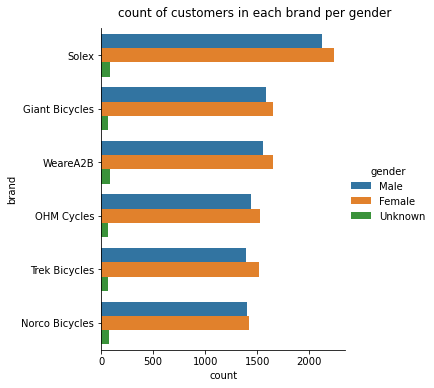

In [301]:
sorting  = trans_customer.brand.value_counts().index
brand = sns.catplot(y = 'brand',data = trans_customer, kind = 'count', order = sorting, hue = 'gender')
brand.fig.suptitle('count of customers in each brand per gender',y = 1.03,x = 0.6)

### the customer wealth segmentation for each brand?

Text(0.6, 1.03, 'count of customers in each brand per wealth segment')

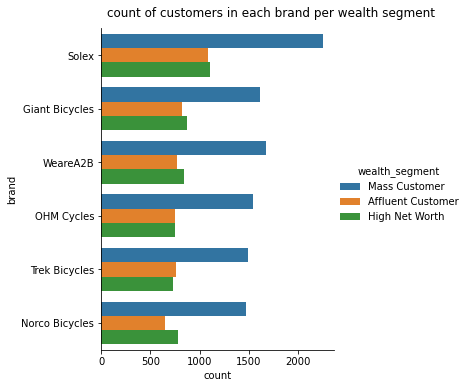

In [302]:
sorting  = trans_customer.brand.value_counts().index
brand = sns.catplot(y = 'brand',data = trans_customer, kind = 'count', order = sorting, hue = 'wealth_segment')
brand.fig.suptitle('count of customers in each brand per wealth segment',y = 1.03,x = 0.6)

### what the count for brand for each age group?

Text(0.6, 1.03, 'count of customers in each brand per age group')

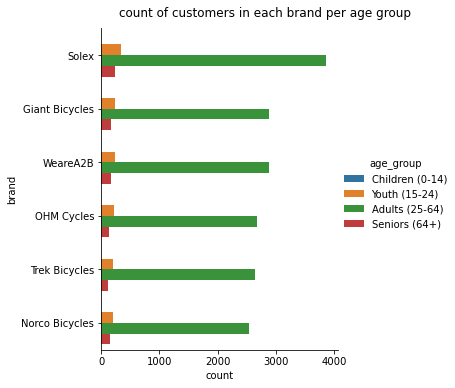

In [303]:
sorting  = trans_customer.brand.value_counts().index
brand = sns.catplot(y = 'brand',data = trans_customer, kind = 'count', order = sorting, hue = 'age_group')
brand.fig.suptitle('count of customers in each brand per age group',y = 1.03,x = 0.6)

### the count of customer gender for each product line?

Text(0.6, 1.03, 'count of transaction in each product line per gender')

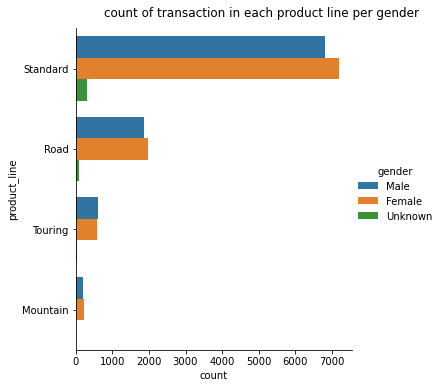

In [304]:
sorting  = trans_customer.product_line.value_counts().index
product_line = sns.catplot(y = 'product_line',data = trans_customer, kind = 'count', order = sorting, hue = 'gender')
product_line.fig.suptitle('count of transaction in each product line per gender',y = 1.03,x = 0.6)

### the count of customer age groub for each product line?

Text(0.6, 1.03, 'count of transaction in each product line per age group')

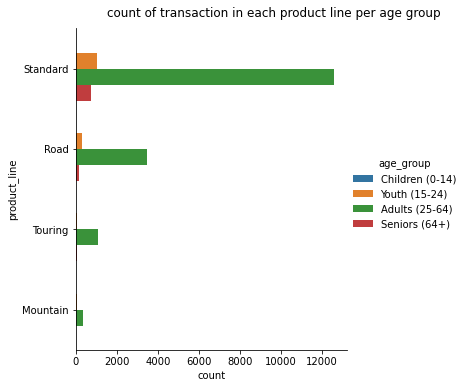

In [305]:
sorting  = trans_customer.product_line.value_counts().index
product_line = sns.catplot(y = 'product_line',data = trans_customer, kind = 'count', order = sorting, hue = 'age_group')
product_line.fig.suptitle('count of transaction in each product line per age group',y = 1.03,x = 0.6)

### what the count of customer gender for each product class?

Text(0.6, 1.03, 'count of transaction in each product class per gender')

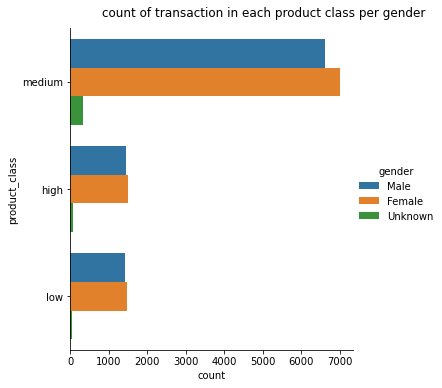

In [306]:
sorting  = trans_customer.product_class.value_counts().index
product_class = sns.catplot(y = 'product_class',data = trans_customer , kind = 'count', order = sorting, hue = 'gender')
product_class.fig.suptitle('count of transaction in each product class per gender',y = 1.03,x = 0.6)

### what the count of customer wealth segmentation for each product class?

Text(0.6, 1.03, 'count of transaction in each product class per wealth segment')

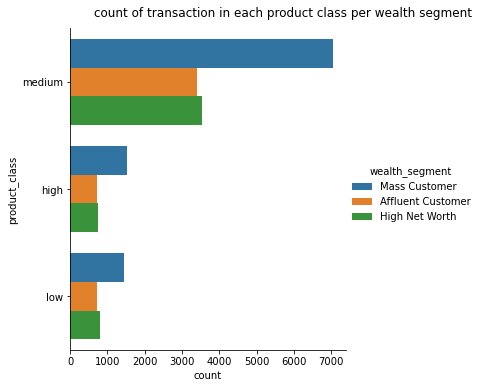

In [307]:
sorting  = trans_customer.product_class.value_counts().index
product_class = sns.catplot(y = 'product_class',data = trans_customer , kind = 'count', order = sorting, hue = 'wealth_segment')
product_class.fig.suptitle('count of transaction in each product class per wealth segment',y = 1.03,x = 0.6)

### what the count of product class for each customer age group ?

Text(0.6, 1.03, 'count of transaction in each product class per age group')

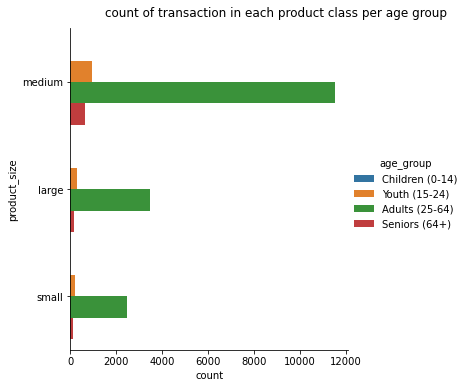

In [308]:
sorting  = trans_customer.product_size.value_counts().index
product_size = sns.catplot(y = 'product_size',data = trans_customer , kind = 'count', order = sorting, hue = 'age_group')
product_size.fig.suptitle('count of transaction in each product class per age group',y = 1.03,x = 0.6)

In [309]:
trans_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19929 entries, 0 to 19928
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19929 non-null  int64         
 1   product_id                           19929 non-null  int64         
 2   customer_id                          19929 non-null  int64         
 3   transaction_date                     19929 non-null  datetime64[ns]
 4   online_order                         19929 non-null  bool          
 5   order_status                         19929 non-null  object        
 6   brand                                19929 non-null  object        
 7   product_line                         19929 non-null  object        
 8   product_class                        19929 non-null  object        
 9   product_size                         19929 non-null  object        
 10  list_price

### what is the gender with the highest gross profit?

Text(0.5, 1.0, 'the gross profit per gender')

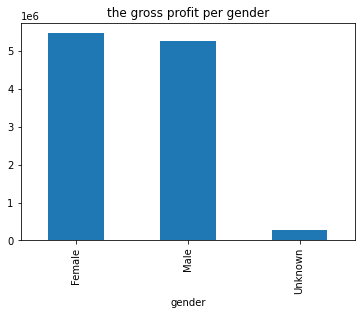

In [310]:
trans_customer.groupby('gender')['gross_profit'].sum().sort_values(ascending = False).plot.bar()
plt.title('the gross profit per gender')

### what is the wealth segment with the highest gross profit?

Text(0.5, 1.0, 'the gross profit per wealth segment')

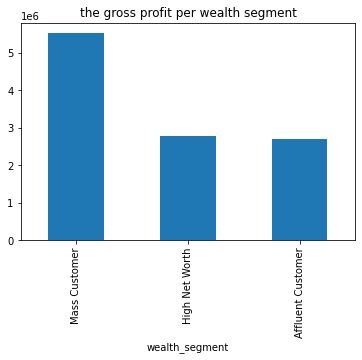

In [311]:
trans_customer.groupby('wealth_segment')['gross_profit'].sum().sort_values(ascending = False).plot.bar()
plt.title('the gross profit per wealth segment')

### what is the state with the highest gross profit?

Text(0.5, 1.0, 'the gross profit per job industry category')

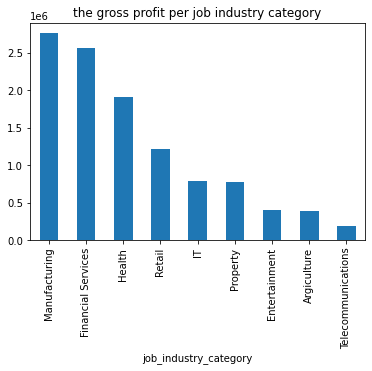

In [312]:
trans_customer.groupby('job_industry_category')['gross_profit'].sum().sort_values(ascending = False).plot.bar()
plt.title('the gross profit per job industry category')

### what are the customer age group with the highest gross profit?

Text(0.5, 1.0, 'the gross profit per age group')

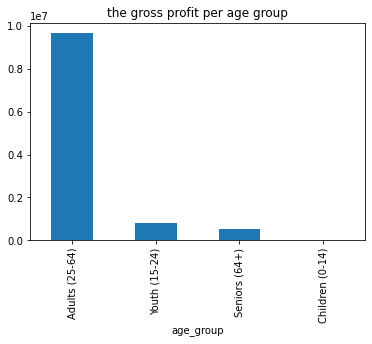

In [313]:
trans_customer.groupby('age_group')['gross_profit'].sum().sort_values(ascending = False).plot.bar()
plt.title('the gross profit per age group')

# Saving data 

In [314]:
newData = pd.ExcelWriter('New Dataset.xlsx')

In [315]:
newTrans.to_excel(newData,'newTransactions',index = False)
newCustomerDemographic.to_excel(newData,'newCustomerDemographic',index = False)
newCustomerAddress.to_excel(newData,'newCustomerAddress',index = False)
newData.save()